<h1 style="text-align: center; color:red">Zabavna analiza izračunljivih funkcija</h1>

## Sadržaj:

1. [Kratak uvod u izračunljivost](#uvod)  
    1.1. [Slavni ljudi](#ljudi)
2. [Inicijalne funkcije](#ini)  
    2.1. [Nula](#nula)  
    2.2. [Sljedbenik](#succ)  
    2.3. [Projekcije](#proj)  
3. [Funkcije višeg reda](#ho)  
    3.1. [Kompozicija](#cmp)  
    3.2. [Primitivna rekurzija](#pr)  
    3.3. [Minimizacija](#min)  
4. [Parsiranje i generiranje](#pgen)  
    4.1. [Parsiranje kodova](#pk)  
    4.2. [Nasumične funkcije](#nf)  
    4.3. [Iscrpne kombinacije](#ik)
5. [Primjeri](#exa)  
    5.1. [Logički operatori](#lo)  
    5.2. [Aritmetika](#arit)  
    5.3. [Složenije](#slo)   

**Ovu liniju obavezno pokrenuti da bismo unutar bilježnice dobro generirali matplotlib prikaze.**

In [28]:
# to show figures in notebook
%matplotlib nbagg

<a id='uvod'></a>
## 1. Kratak uvod u izračunljivost

$\newcommand{\code}[1]{\texttt{#1}}$

Posve neformalno, ali dovoljno precizno; kažemo da je funkcija izračunljiva ako je možemo kreirati pomoću inicijalnih funkcija.  
Inicijalne funkcije su **nula**, **sljedbenik** i **projekcije**, a alati za kreiranja koje imamo na raspolaganju su **kompozicija**, **primitivna rekurzija** i **minimizacija**.  


Sve inicijalne funkcija, kompoziciju, primitivnu rekurziju i minimizaciju napisat ćemo kao objekte sličnih svojstava, te ćemo dodatno definirati i funkcije višeg reda $\code{compose}$, $\code{prim_recurse}$ i $\code{minimize}$ kojima ćemo lako kreirati nove funkcije.

---
Dodatno o izračunljivosti može se pročitati na sljedećim linkovima:

- [Izračunljivost (predavanja Vedrana Čačića)](https://1c9dd60f-a-62cb3a1a-s-sites.googlegroups.com/site/mathnastava/home/izracunljivost/noveverzije/izracunljivost-slajdovi%20%282%29.pdf?attachauth=ANoY7cqlHThvKM0VITfk_RFIHFNbql5UoDI2XX7a9ynzl01dg5bF9Fe0eN7swDQ2d65vwYlMZ78kSeFiNAN2IeXU084GG8iwDsIEbBWvsTNMf4n3HaXIiYV4A5g-w9jvEpyeHWO2qkLV6NR2RRmVHyX29h1OvfbxhM2ppLmuFXZ7VRPV1Qt90puSbmTVaT16wC3SAKJC60-h71j-PMDMzHMIWIKFXGMk3cK3pSkJ3Waz5rg7GuifQPzyep6tixFjPnYogGp77dQuo44aMFsXmq7EQ26KoAgPsAxe1r3AwJeCPqUqpZZcq-Q%3D&attredirects=0)
- [Izračunljivost u $\lambda$-računu](https://github.com/sandrolovnicki/tex_works/blob/master/Computability%20in%20%CE%BB-calculus/Izra%C4%8Dunljivost%20u%20%CE%BB-ra%C4%8Dunu%20(croatian).pdf)

<a id='slavni'></a>
### 1.1. Slavni ljudi

<a id='ini'></a>
## Inicijalne funkcije

<a id='nula'></a>
### 2.1. Nula

Nulu je funkcija koju označujemo sa $\code{Z}$ i definiramo
$$Z : \mathbb{N}^k \rightarrow \mathbb{N}$$
$$Z(\overrightarrow{x}) = 0$$

Kako $\code{Z}$ djeluje i kako ju je korisno (kao i sve ostale funkcije koje ćemo spominjati) zamišljati, ilustrirano je sljedećom animacijom. Dodatno, animacija je napisana u obliku funkcije jer ćemo je koristiti i za još neke funkcije koje ćemo definirati.

<IPython.core.display.Javascript object>


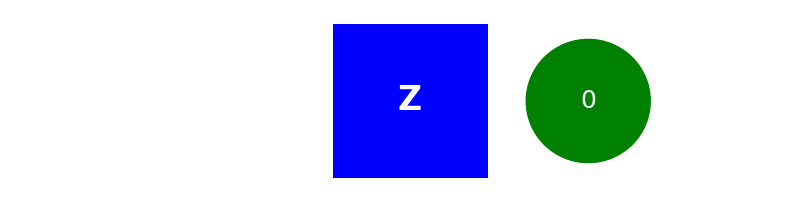

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def function_animation(function,rule,value):
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.set_frame_on(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.set_xlim([0,8])
    ax.set_ylim([0,2])

    funpos = (3,0)
    datapos = (1,1)
    radius = 1

    funrect = plt.Rectangle(funpos, 2*radius,2*radius, fc='b', zorder=2)
    funname = ax.annotate(function, xy=(funpos[0]+radius,funpos[1]+radius), color='w', weight='bold', fontsize=24, ha='center', va='center')

    data = plt.Circle(datapos, 0.8*radius, fc='r', zorder=0)
    dataval = ax.annotate(value, xy=data.center, color='w', fontsize=18, ha='center', va='center', zorder=1)

    ax.add_patch(data)
    ax.add_patch(funrect)

    def update(i):
        x,y = data.center
        x = datapos[0] + 0.05*i
        if x==1:
            data.set_color('r')
            dataval.set_text(value)
        data.center = (x, y)
        dataval.set_position((x,y))
        dataval.xy = (x,y)
        if x>funpos[0]+radius:
            data.set_color('g')
            if isinstance(value,list):
                dataval.set_text(rule(*value))
            else:
                dataval.set_text(rule(value))
        return data, dataval

    plt.show()
    return animation.FuncAnimation(fig, update, frames=120, interval=60, blit=True)
    
function_animation('Z',lambda x:0,3)

Definiramo sad i klasu koja će predstavljati spomenutu funkciju $\code{Z}$. Primijetimo da je ova klasa *callable* te se u tom slučaju ponaša upravo kao funkcija $\code{Z}$.

In [3]:
class zero(object):
    code = 0
    def __call__(self,*args):
        return 0
    def __str__(self):
        return 'Z'
    def __eq__(self, other):
        return self.code == other.code

Pogledajmo ponašanje ovog objekta i primijetimo njegova svojstva na sljedećim primjerima.

In [4]:
Z = zero()
print(Z(), Z(3), Z(3,2,5))
print(Z)

0 0 0
Z


<a id='succ'></a>
### 2.2. Sljedbenik
Funkciju sljedbenika označujemo sa $\code{S}$ i **inače** definiramo:
$$S : \mathbb{N} \rightarrow \mathbb{N}$$
$$S(x) = x+1$$
Da bismo izbjegli neželjene greške vezane uz broj argumenata (a želimo kod zadržati koliko-toliko jednostavnim) kad ćemo kreirati sve moguće kombinacije od 1,2,3,... inicijalne funkcije, definirat ćemo funkciju sljedbenika kao: 
$$S : \mathbb{N}^k \rightarrow \mathbb{N}$$ 
$$S(\overrightarrow{x}) = x_1+1$$

In [5]:
class successor(object):
    code = 1
    #def: accept even multiple aguments, but work with first
    def __call__(self,*args):
        if len(args) == 0:
            return 0
        return args[0]+1
    def __str__(self):
        return 'S'
    def __eq__(self, other):
        return self.code == other.code

In [6]:
S = successor()
print(S(), S(2), S(2,3,5))
print(S)

0 3 3
S


<IPython.core.display.Javascript object>


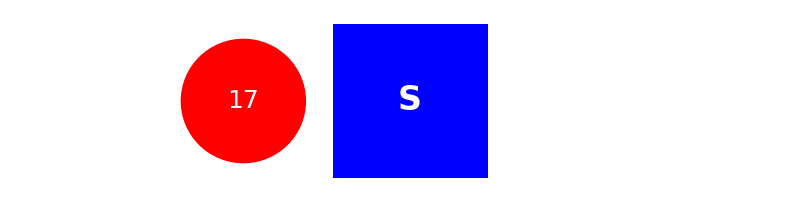

In [7]:
function_animation('S',lambda x:x+1,17)

<a id='proj'></a>
### 2.3. Projekcija 
Projekciju označujemo s $I$ te definiramo
$$I : \mathbb{N}^{k+1} \rightarrow \mathbb{N}$$ 
$$I(n,\overrightarrow{x}) = x_n, 1 \leq n \leq k$$
Opet, da bismo izbjegli neželjene greške tijekom generiranja svih kombinacija, definirat ćemo projekciju s
$$I : \mathbb{N}^{k+1} \rightarrow \mathbb{N}$$ 
$$I(n,\overrightarrow{x}) = \begin{cases} 
      x_n & 1 \leq n \leq k \\
      x_k & n > k 
   \end{cases}
$$


In [8]:
class projection(object):
    code = [2]
    def __init__(self,n=1):
        self.n = n
        self.code = [2,n]
    def __call__(self,*args):
        if len(args) == 0:
            return 0
        # def: return last argument if n is out of args bounds
        if len(args) < self.n:
            return args[-1]
        return args[self.n-1]
    def __str__(self):
        return 'I'+str(self.n)
    def __eq__(self, other):
        return self.code == other.code

I2 = projection(2)
print(I2(1,2,3,4))
print(I2.code)
print(I2)
    

2
[2, 2]
I2


<IPython.core.display.Javascript object>


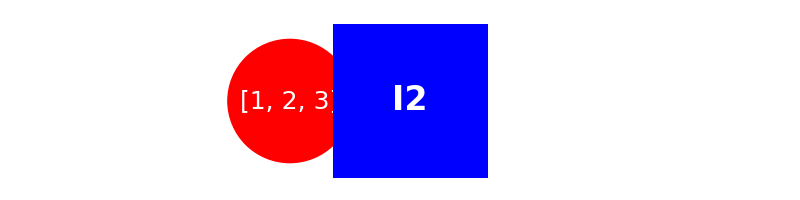

In [9]:
function_animation('I2',lambda *args:args[1],[1,2,3])

<a id='ho'></a>
## 3. Funkcije višeg reda

<a id='cmp'></a>
### 3.1. Kompozicija

In [10]:
def compose(g, *hs):
    hs_num = len(hs)
    g_params = [None]*hs_num
    class composition(object):
        code = [3]
        def __init__(self):
            self.code.extend([g.code,*[h.code for h in hs]])
        def __call__(self,*args):
            for i in range(0,hs_num):
                g_params[i] = hs[i](*args)
            return g(*g_params)
        def __str__(self):
            try:
                return self.name
            except AttributeError:
                name = '('+str(g)+'¤'
                if(hs_num>1):
                    name += '('
                for i in range(0,hs_num-1):
                    name += str(hs[i])+','
                name += str(hs[-1])
                if(hs_num>1):
                    name += ')'
                return name+')'
        def __eq__(self, other):
            return self.code == other.code
        def set_name(self,name):
            self.name = name
    return composition()
    

In [11]:
test = compose(I2,S,compose(S,Z))
print(test(11))
print(test.code)
print(test)
test.set_name("test")
print(test)

1
[3, [2, 2], 1, [3, 1, 0]]
(I2¤(S,(S¤Z)))
test


<IPython.core.display.Javascript object>


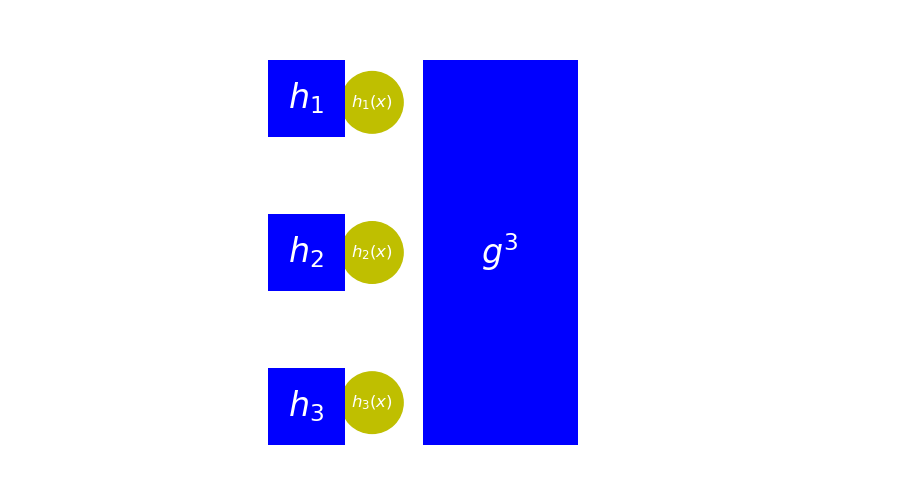

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim([0,9])
ax.set_ylim([0,5])

h1pos = (2,4)
h2pos = (2,2)
h3pos = (2,0)
gpos = (4,0)
data1pos = (0.5,2.5)
data2pos = (0.5,2.5)
data3pos = (0.5,2.5)
radius = 0.5

h1rect = plt.Rectangle(h1pos, 2*radius,2*radius, fc='b', zorder=2)
h1name = ax.annotate("$h_1$", xy=(h1pos[0]+radius,h1pos[1]+radius), color='w', weight='bold', fontsize=24, ha='center', va='center')
h2rect = plt.Rectangle(h2pos, 2*radius,2*radius, fc='b', zorder=2)
h2name = ax.annotate("$h_2$", xy=(h2pos[0]+radius,h2pos[1]+radius), color='w', weight='bold', fontsize=24, ha='center', va='center')
h3rect = plt.Rectangle(h3pos, 2*radius,2*radius, fc='b', zorder=2)
h3name = ax.annotate("$h_3$", xy=(h3pos[0]+radius,h3pos[1]+radius), color='w', weight='bold', fontsize=24, ha='center', va='center')
grect = plt.Rectangle(gpos, 4*radius,10*radius, fc='b', zorder=2)
gname = ax.annotate("$g^3$", xy=(gpos[0]+2*radius,gpos[1]+5*radius), color='w', weight='bold', fontsize=24, ha='center', va='center')

data1 = plt.Circle(data1pos, 0.8*radius, fc='r', zorder=0)
data1val = ax.annotate('x', xy=data1.center, color='w', fontsize=12, ha='center', va='center', zorder=1)
data2 = plt.Circle(data2pos, 0.8*radius, fc='r', zorder=0)
data2val = ax.annotate('x', xy=data1.center, color='w', fontsize=12, ha='center', va='center', zorder=1)
data3 = plt.Circle(data3pos, 0.8*radius, fc='r', zorder=0)
data3val = ax.annotate('x', xy=data1.center, color='w', fontsize=12, ha='center', va='center', zorder=1)

ax.add_patch(data1)
ax.add_patch(data2)
ax.add_patch(data3)
ax.add_patch(h1rect)
ax.add_patch(h2rect)
ax.add_patch(h3rect)
ax.add_patch(grect)

def update(i):
    x1,y1 = data1.center
    x2,y2 = data2.center
    x3,y3 = data3.center
    if x1==0.5:
        data1.set_visible(True)
        data1.set_color('r')
        data1val.set_text('x')
        data2.set_radius(0.8*radius)
        data2.set_color('r')
        data2val.set_text('x')
        data2val.set_fontsize(12)
        data3.set_visible(True)
        data3.set_color('r')
        data3val.set_text('x')
    x1 = data1pos[0] + 0.05*i
    x2 = data2pos[0] + 0.05*i
    x3 = data3pos[0] + 0.05*i
    if x1<h1pos[0]+radius:
        y1 = data1pos[1] + 0.05*i
        y3 = data3pos[1] - 0.05*i
        
    data1.center = (x1, y1)
    data2.center = (x2, y2)
    data3.center = (x3, y3)
    data1val.set_position((x1,y1))
    data1val.xy = (x1,y1)
    data2val.set_position((x2,y2))
    data2val.xy = (x2,y2)
    data3val.set_position((x3,y3))
    data3val.xy = (x3,y3)
    
    if x1>h1pos[0]+radius:
        data1.set_color('y')
        data1val.set_text("$h_1(x)$")
        data2.set_color('y')
        data2val.set_text("$h_2(x)$")
        data3.set_color('y')
        data3val.set_text("$h_3(x)$")
    if x1>gpos[0]+2*radius:
        data1.set_visible(False)
        data2.set_color('g')
        data2.set_radius(1.8*radius)
        data2val.set_text("$g(h_1(x),h_2(x),h_3(x))$")
        data2val.set_fontsize(10)
        data3.set_visible(False)
        
    return data1, data1val, data2, data2val, data3, data3val

plt.show()
animation.FuncAnimation(fig, update, frames=150, interval=60, blit=True)


<a id='pr'></a>
### 3.2. Primitivna rekurzija

In [13]:
def prim_recurse(g, h):
    class prim_recursion(object):
        code = [4]
        def __init__(self):
            self.code.extend([g.code,h.code])
        def __call__(self,*args):
            # po definiciji
            if isinstance(args,int):
                # degenerate version
                if args == 0:
                    return g(0)
                return h(args-1,prim_recurse(g,h)(args-1))
            # non-degenerate
            if args[-1] == 0:
                return g(*args[:-1])
            return h(*args[:-1],args[-1]-1,prim_recurse(g,h)(*args[:-1],args[-1]-1))
        def __str__(self):
            try:
                return self.name
            except AttributeError:
                return '('+str(g)+".PR."+str(h)+')'
        def __eq__(self, other):
            return self.code == other.code
        def set_name(self,name):
            self.name = name
    return prim_recursion()

In [14]:
I1 = projection(1)
I3 = projection(3)
add = prim_recurse(I1,compose(S,I3))
print(add)
print("9+11="+str(add(9,11)))

pdc = prim_recurse(Z,I1)
print(pdc.code)
sub = prim_recurse(I1,compose(pdc,I3))
print(sub)
print("5-2="+str(sub(5,2)))

(I1.PR.(S¤I3))
9+11=20
[4, 0, [2, 1]]
(I1.PR.((Z.PR.I1)¤I3))
5-2=3


<a id='min'></a>
### 3.3. Minimizacija

In [15]:
def minimize(g):
    class minimization(object):
        code = [5]
        def __init__(self):
            self.code.append(g.code)
        def __call__(self,*args):
            y = 0
            # po definiciji
            while g(*args,y) != 0: 
                y += 1
                if y > 100:
                    return -1
            return y
        def __str__(self):
            try:
                return self.name
            except AttributeError:
                return "min("+str(g)+')'
        def __eq__(self, other):
            return self.code == other.code
        def set_name(self,name):
            self.name = name
    return minimization()

In [16]:
simple = minimize(sub)
print(simple.code)
print(simple(3))

[5, [4, [2, 1], [3, [4, 0, [2, 1]], [2, 3]]]]
3


<a id='pgen'></a>
## 4. Parsiranje i generiranje

<a id='pk'></a>
### 4.1. Parsiranje kodova

In [17]:
# creating functions from code
def parse_from_code(code):
    if isinstance(code,int):
        if code == 0:
            return zero()
        if code == 1:
            return successor()
        #raise ValueError("In this code position only zero (code 0) and successor (code 1) are allowed.")
        return None
    argl = len(code)-1
    if code[0] == 2:
        if argl == 1 and isinstance(code[1],int):
            return projection(code[1])
        #raise ValueError("Projection (code 2) must be followed by 1 integer representing its projecting dimension but you provided " + str(argl))
        return None
    if code[0] == 3:
        if argl > 2:
            for i in range (1,argl+1):
                if parse_from_code(code[i]) is None:
                    return None
            return compose(parse_from_code(code[1]),*[parse_from_code(hc) for hc in code[2:]])
        #raise ValueError("Composition (code 3) is defined with at least 2 functions (arguments) but you provided just " + str(argl))
        return None
    if code[0] == 4:
        if argl == 2 and parse_from_code(code[1]) is not None and parse_from_code(code[2]) is not None:
            return prim_recurse(parse_from_code(code[1]), parse_from_code(code[2]))
        #raise ValueError("Primitive recursion (code 4) is defined with exactly 2 functions (arguments) but you provided " + str(argl))
        return None
    if(code[0] == 5):
        if argl == 1 and parse_from_code(code[1]) is not None:
            return minimize(parse_from_code(code[1]))
        #raise ValueError("Minimization (code 5) is defined with exaclty 1 function (argument) but you provided " + str(argl))    
        return None
    else:
        #raise ValueError("Higher order function codes are: 3,4,5 but you provided " + str(code[0]))
        return None

In [18]:
ss = parse_from_code(1)
print(ss(3))

comp_test = compose(S,Z)
print(comp_test.code)
print(parse_from_code(comp_test.code))

ct2 = compose(S,comp_test)
print(ct2.code)
print(parse_from_code(ct2.code))

print(parse_from_code([1,0,1,1,1]))
print("---")

print(add.code)
print(parse_from_code(add.code))

4
[3, 1, 0]
None
[3, 1, [3, 1, 0]]
None
None
---
[4, [2, 1], [3, 1, [2, 3]]]
None


<a id='nf'></a>
### 4.2. Nasumične funkcije

In [19]:
import random as rnd

def random_code(depth,maxlen):
    eltype = rnd.randint(0,1)
    if eltype==0 and depth!=0:
        return rnd.randint(1,5)
    else:
        depth+=1
        if depth>=3:
            return rnd.randint(1,5)
        else:
            lilen = rnd.randint(2,maxlen)
            retlist = []
            for i in range(0,lilen):
                retlist.append(random_code(depth,maxlen))
            return retlist    

In [20]:
import random as rnd
import pandas as pd

cdlist = []
fnlist = []
cdnum = 10000
for i in range(0,cdnum):
    code = random_code(0,3)
    cdlist.append(str(code))
    fnlist.append(parse_from_code(code))

dframe = pd.DataFrame({"codes": cdlist, "functions": fnlist})
dframe.columns = ["code", "function"]
dframe

,code,function
0,"[[4, 3, 1], 5]",None
1,"[3, [4, 2], [1, 2]]",None
2,"[[1, 1, 1], [3, 4], 5]",None
3,"[3, 5]",None
4,"[[4, 2, 5], [4, 5, 2]]",None
5,"[[3, 1], 1, [2, 1]]",None
6,"[[1, 2], 3]",None
7,"[1, 4]",None
8,"[[2, 2], 3, [3, 4]]",None
9,"[3, [1, 3], [4, 2]]",None


Pogledajmo sad koliko od ovih kodova zaista predstavlja valjan kod izračunljive funkcije.

In [21]:
nonNone_frame = dframe[dframe.function.notnull()]
print("Broj kodova koji se nisu parsirali u None: ", nonNone_frame.shape[0], "od", cdnum)
nonNone_frame

Broj kodova koji se nisu parsirali u None:  369 od 10000


,code,function
48,"[5, [5, 1]]",min(min(S))
65,"[2, 5]",I5
84,"[2, 3]",I3
93,"[2, 1]",I1
121,"[5, 1]",min(S)
155,"[2, 1]",I1
157,"[2, 5]",I5
221,"[2, 3]",I3
301,"[2, 1]",I1
333,"[5, [2, 4]]",min(I4)


<a id='ik'></a>
### 4.3. Iscrpne kombinacije

Kreiramo prvo neke važne pomoćne funkcije

In [22]:
add = prim_recurse(I1,compose(S,I3))
add.set_name("add")
print(add(2,3))

5


In [23]:
Z = zero()
S = successor()

funs = [Z,S]

def all_combinations(n,argnum):
    # add appropriate projections
    for i in range (1,argnum+1):
        funs.append(projection(i))
    # start algorithm
    if n==1:
        return [f for f in funs]
    functions = []
    lowers = all_combinations(n-1,argnum)
    for lf in lowers:
        
        functions.append(minimize(lf))
        
        for f in funs:
            
            c12 = compose(f,lf)
            if c12 not in functions:
                functions.append(c12)
            if lf is not f:
                c21 = compose(lf,f)
                if c21 not in functions:
                    functions.append(c21)
            
            p12 = prim_recurse(f,lf)
            if p12 not in functions:
                functions.append(p12)
            if lf is not f:
                p21 = prim_recurse(lf,f)
                if p21 not in functions:
                    functions.append(p21)
                    
    return functions
    

In [24]:
import pandas as pd

fns = all_combinations(3,2)

print("Functions count:", len(fns))

for f in fns:
    if f(2,3) == 6:
        print(f, f(2,5))

print("Done.")

dframe = pd.DataFrame({"functions": fns})
dframe.columns = ["function"]
dframe

Functions count: 616
Done.


,function
0,min(min(Z))
1,(Z¤min(Z))
2,(min(Z)¤Z)
3,(Z.PR.min(Z))
4,(min(Z).PR.Z)
5,(S¤min(Z))
6,(min(Z)¤S)
7,(S.PR.min(Z))
8,(min(Z).PR.S)
9,(I1¤min(Z))


Jasno, količina izračunljivih funkcija raste eksponencijalno s brojem funkcija članica od kojih ih gradimo. To možemo vidjeti i na sljedećem grafu za $n = 1,2,3$.

<IPython.core.display.Javascript object>


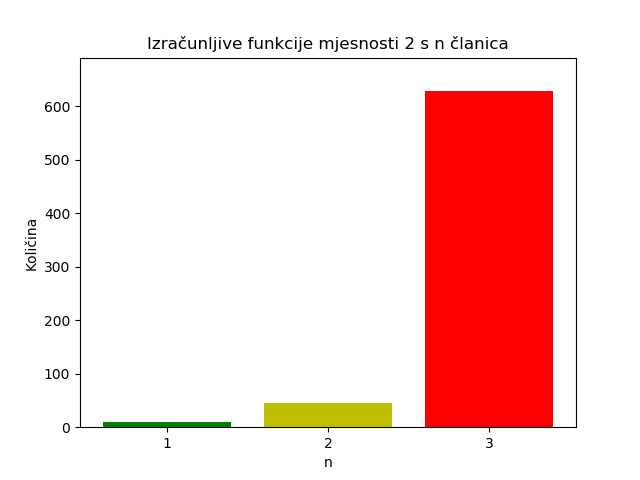

Text(0.5,1,'Izračunljive funkcije mjesnosti 2 s n članica')

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ind = np.arange(1, 4)
fsc = [len(all_combinations(i,2)) for i in ind]

b1, b2, b3 = plt.bar(ind, fsc)
b1.set_facecolor('g')
b2.set_facecolor('y')
b3.set_facecolor('r')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_ylim([0, 1.1*fsc[-1]])
ax.set_xlabel('n')
ax.set_ylabel('Količina')
ax.set_title('Izračunljive funkcije mjesnosti 2 s n članica')

<a id='exa'></a>
## 5. Primjeri

<a id='lo'></a>
### 5.1. Logički operatori

<a id='arit'></a>
### 5.2. Artimetika

<a id='slo'></a>
### 5.3. Složenije

**TODO:** write programs (lists of codes)

**TODO:** Za kraj, napišimo nekoliko klasičnih algoritama koristeći samo spomenute definicije